# 이탈 예측모형

In [3]:
# 분석에 사용할 패키지 로딩
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import xgboost as xgb

## *2*. 데이터 불러오기 및 확인

In [6]:
# pandas 옵션 모든 컬럼 표시
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)

# 그래프 스타일 선택 
plt.style.use('ggplot')  

# 그래프 바로 보기 
%matplotlib inline

In [7]:
data = pd.read_csv("Cell2Cell_NA.csv")

In [9]:

data.head() # 처음 5개 데이터 확인

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
0,57.49,482.75,37.43,0.25,22.75,0.0,532.25,50.99,8.33,1.00,61.33,1.67,0.33,55.28,46.33,6.33,83.67,157.00,9.33,0.0,5.67,0,56,1,1,MILMIL414,7.0,6.0,240.0,1000002,30.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,5,0,1,0,149.99,0,0,NaN
1,82.28,1312.25,75.00,1.24,0.00,0.0,156.75,8.14,52.00,7.67,76.00,4.33,1.33,200.32,370.33,147.00,555.67,303.67,59.67,0.0,22.67,0,59,2,2,PITHOM412,9.0,4.0,458.0,1000006,30.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,9.99,0,0,NaN
2,31.66,25.50,29.99,0.25,0.00,0.0,59.50,4.03,0.00,1.00,2.33,0.00,0.00,0.00,0.00,0.00,1.67,1.67,1.00,0.0,0.00,0,57,2,2,OKCTUL918,2.0,2.0,601.0,1000010,52.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,9,0,1,0,29.99,0,0,NaN
3,62.13,97.50,65.98,2.48,0.00,0.0,23.50,6.82,0.00,0.33,4.00,4.00,0.00,0.00,3.67,0.00,7.67,7.33,0.33,0.0,0.00,0,59,2,2,OKCOKC405,3.0,3.0,464.0,1000011,46.0,46.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,0,29.99,0,0,NaN
4,25.22,2.50,25.00,0.00,0.00,0.0,-2.50,-0.23,0.00,0.00,0.33,0.00,0.00,1.13,0.33,0.00,0.67,0.67,0.00,0.0,0.00,0,53,2,2,SANMCA210,2.0,2.0,354.0,1000014,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,29.99,0,0,NaN


In [10]:
data.tail() # 마지막 5개 데이터 확인 

,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
71042,117.49,384.0,29.99,0.0,250.0,0.0,0.0,0.0,4.00,1.00,27.00,0.00,0.00,21.70,1.33,0.00,99.33,54.33,5.0,0.0,0.00,1,30,1,1,LAXDOW562,2.0,2.0,489.0,1099987,22.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,29.99,0,1,1.0
71043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,2.00,1.67,0.0,0.0,0.00,1,25,1,1,LAXRIV909,1.0,1.0,773.0,1099988,34.0,26.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,6,0,0,1,0.00,0,1,1.0
71044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.33,2.67,48.33,0.00,0.00,58.92,17.00,1.33,160.33,33.33,12.0,0.0,0.33,1,29,1,1,LAXSFN818,2.0,2.0,526.0,1099990,68.0,64.0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,6,0,0,0,59.99,0,1,1.0
71045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,1.32,0.67,0.33,5.33,3.33,0.0,0.0,0.00,1,25,1,1,LAXCOR909,1.0,1.0,773.0,1099992,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,8,0,1,1,0.00,0,1,1.0
71046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.67,4.33,287.00,1.33,13.67,1225.28,430.33,87.67,1359.00,910.33,76.0,0.0,6.67,1,25,1,1,LAXCDG310,3.0,2.0,378.0,1099995,36.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7,0,1,0,79.99,0,1,1.0


In [11]:
# 전체 데이터 모양 확인
data.shape

(71047, 78)

In [12]:
# 각 컬럼별 유형 확인
type(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REVENUE   70831 non-null  float64
 1   MOU       70831 non-null  float64
 2   RECCHRGE  70831 non-null  float64
 3   DIRECTAS  70831 non-null  float64
 4   OVERAGE   70831 non-null  float64
 5   ROAM      70831 non-null  float64
 6   CHANGEM   70545 non-null  float64
 7   CHANGER   70545 non-null  float64
 8   DROPVCE   71047 non-null  float64
 9   BLCKVCE   71047 non-null  float64
 10  UNANSVCE  71047 non-null  float64
 11  CUSTCARE  71047 non-null  float64
 12  THREEWAY  71047 non-null  float64
 13  MOUREC    71047 non-null  float64
 14  OUTCALLS  71047 non-null  float64
 15  INCALLS   71047 non-null  float64
 16  PEAKVCE   71047 non-null  float64
 17  OPEAKVCE  71047 non-null  float64
 18  DROPBLK   71047 non-null  float64
 19  CALLFWDV  71047 non-null  float64
 20  CALLWAIT  71047 non-null  fl

NoneType

### 2.2 데이터셋트 분리 및 타겟 확인

In [13]:
# 학습 및 테스트 데이터 세트 확인 
pd.concat ([data['CHURNDEP'].value_counts(dropna= False),
            data['CHURNDEP'].value_counts(dropna= False, normalize= True)*100],
            axis = 1)   

## NaN의 비율이 43.6%  
## 0과 1의 비율이 각각 28.1%

,CHURNDEP,CHURNDEP
NaN,31047,43.699241
0.0,20000,28.150379
1.0,20000,28.150379


In [14]:
# Target 비율 확인 
pd.concat([data['CHURN'].value_counts(dropna= False),
           data['CHURN'].value_counts(dropna= False, normalize = True) *100],
          axis = 1)

## 1 (이탈) 비율이 전체 29.0%
## 0 (유지) 비율이 전체 70.9%

,CHURN,CHURN
0,50438,70.992442
1,20609,29.007558


In [15]:
# 데이터 세트 구분 및 target 비율 같이 보기 
pd.concat(
    [data[['CHURNDEP','CHURN']].value_counts(dropna= False, sort = False),
     data[['CHURNDEP','CHURN']].value_counts(dropna= False, sort = False, normalize =True)*100],
     axis = 1)


0          1
CHURNDEP CHURN                  
0.0      0      20000  28.150379
1.0      1      20000  28.150379
NaN      0      30438  42.842062
         1        609   0.857179

In [16]:
# 테스트 데이터 셋트의 CHURN 비율 확인 

data[pd.isnull(data['CHURNDEP'])].CHURN.value_counts(normalize =True)

0    0.980385
1    0.019615
Name: CHURN, dtype: float64

학습 데이터   : CHURNDEP가 0 or 1 -> 4만, 전체 56.3% 
- label  비율 50 : 50  (balancing)

테스트 데이터 : CHURNDEP가 NaN    -> 3.1만, 43.7%
- label  비율 98 : 2 (실제 비율)

## *3*. Null값 확인 및 처리

In [17]:
# data 에 포함된  Null 값 수 확인 
print(data.isnull().sum().sum())

print(data.isnull().sum().sum()/data.shape[0])

## 35,866 건 , 약 50%  

35866
0.5048207524596394


In [18]:
# Null 값이 있는 변수 확인
pd.set_option('display.max_rows', None)  # 변수 리스트 전체 보려고

data.isnull().sum()

## REVENUE, MOU, RECCHRGE, DIRECTAS, OVERAGE, ROAM : 각 216개 
## CHANGEM, CHANGER : 각 502개 
## PHONE, MODELS, EQPDAYS : 각 1개 
## CSA : 28개
## AGE1 ,AGE2 : 1,244
## CHURNDEP : 31,047개 

REVENUE       216
MOU           216
RECCHRGE      216
DIRECTAS      216
OVERAGE       216
ROAM          216
CHANGEM       502
CHANGER       502
DROPVCE         0
BLCKVCE         0
UNANSVCE        0
CUSTCARE        0
THREEWAY        0
MOUREC          0
OUTCALLS        0
INCALLS         0
PEAKVCE         0
OPEAKVCE        0
DROPBLK         0
CALLFWDV        0
CALLWAIT        0
CHURN           0
MONTHS          0
UNIQSUBS        0
ACTVSUBS        0
CSA            28
PHONES          1
MODELS          1
EQPDAYS         1
CUSTOMER        0
AGE1         1244
AGE2         1244
CHILDREN        0
CREDITA         0
CREDITAA        0
CREDITB         0
CREDITC         0
CREDITDE        0
CREDITGY        0
CREDITZ         0
PRIZMRUR        0
PRIZMUB         0
PRIZMTWN        0
REFURB          0
WEBCAP          0
TRUCK           0
RV              0
OCCPROF         0
OCCCLER         0
OCCCRFT         0
OCCSTUD         0
OCCHMKR         0
OCCRET          0
OCCSELF         0
OWNRENT         0
MARRYUN   

In [19]:
# Null 값이 있는 변수 확인 
data.columns[data.isnull().sum()>0]

## 'CHURNDEP'는 Null 값이 테스트 데이터로 의미있는 Null 값으로 제외하고 다시 Null 값 확인

Index(['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM',
       'CHANGER', 'CSA', 'PHONES', 'MODELS', 'EQPDAYS', 'AGE1', 'AGE2',
       'CHURNDEP'],
      dtype='object')

In [20]:
# 학습과 테스트를 구분하는 변수를 제외한 Null 값수 
data.iloc[:,:77].isnull().sum().sum()

## 4,819 건

4819

In [21]:
# REVENUE 가 NULL 값인것 확인해보기 
data[pd.isnull(data['REVENUE'])].iloc[:,:77].isnull().sum()

## REVENUE, MOU, RECCHRGE, DIRECTAS, OVERAGE, ROAM, CHANGEM, CHANGER  8개 컬럼은 하나의 값이 Null 값이면 모두 Null 값 
## Null 값이 의미가 있는 Null 인가? Null이 나올 수 있나? 
## Yes 일시정지 같은경우 Null 이 나올 수 있고, 이는 0 을 의미함 

REVENUE     216
MOU         216
RECCHRGE    216
DIRECTAS    216
OVERAGE     216
ROAM        216
CHANGEM     216
CHANGER     216
DROPVCE       0
BLCKVCE       0
UNANSVCE      0
CUSTCARE      0
THREEWAY      0
MOUREC        0
OUTCALLS      0
INCALLS       0
PEAKVCE       0
OPEAKVCE      0
DROPBLK       0
CALLFWDV      0
CALLWAIT      0
CHURN         0
MONTHS        0
UNIQSUBS      0
ACTVSUBS      0
CSA           0
PHONES        0
MODELS        0
EQPDAYS       0
CUSTOMER      0
AGE1          6
AGE2          6
CHILDREN      0
CREDITA       0
CREDITAA      0
CREDITB       0
CREDITC       0
CREDITDE      0
CREDITGY      0
CREDITZ       0
PRIZMRUR      0
PRIZMUB       0
PRIZMTWN      0
REFURB        0
WEBCAP        0
TRUCK         0
RV            0
OCCPROF       0
OCCCLER       0
OCCCRFT       0
OCCSTUD       0
OCCHMKR       0
OCCRET        0
OCCSELF       0
OWNRENT       0
MARRYUN       0
MARRYYES      0
MARRYNO       0
MAILORD       0
MAILRES       0
MAILFLAG      0
TRAVEL        0
PCOWN   

In [22]:
data[pd.isnull(data['AGE1'])].iloc[:,:77].isnull().sum()

## AGE1이 NULL인것을 살펴보니 6개 row는 Null 값이 계속 같이 있는 유저임 -> 이 유저는 분석에 삭제 !!! 

REVENUE        6
MOU            6
RECCHRGE       6
DIRECTAS       6
OVERAGE        6
ROAM           6
CHANGEM        9
CHANGER        9
DROPVCE        0
BLCKVCE        0
UNANSVCE       0
CUSTCARE       0
THREEWAY       0
MOUREC         0
OUTCALLS       0
INCALLS        0
PEAKVCE        0
OPEAKVCE       0
DROPBLK        0
CALLFWDV       0
CALLWAIT       0
CHURN          0
MONTHS         0
UNIQSUBS       0
ACTVSUBS       0
CSA            0
PHONES         0
MODELS         0
EQPDAYS        0
CUSTOMER       0
AGE1        1244
AGE2        1244
CHILDREN       0
CREDITA        0
CREDITAA       0
CREDITB        0
CREDITC        0
CREDITDE       0
CREDITGY       0
CREDITZ        0
PRIZMRUR       0
PRIZMUB        0
PRIZMTWN       0
REFURB         0
WEBCAP         0
TRUCK          0
RV             0
OCCPROF        0
OCCCLER        0
OCCCRFT        0
OCCSTUD        0
OCCHMKR        0
OCCRET         0
OCCSELF        0
OWNRENT        0
MARRYUN        0
MARRYYES       0
MARRYNO        0
MAILORD       

In [23]:
data[pd.isnull(data['CSA'])].iloc[:,:77].isnull().sum()
## CSA 는 NULL 값이 다른 변수의 Null값과 겹치지 않음.  

REVENUE      0
MOU          0
RECCHRGE     0
DIRECTAS     0
OVERAGE      0
ROAM         0
CHANGEM      0
CHANGER      0
DROPVCE      0
BLCKVCE      0
UNANSVCE     0
CUSTCARE     0
THREEWAY     0
MOUREC       0
OUTCALLS     0
INCALLS      0
PEAKVCE      0
OPEAKVCE     0
DROPBLK      0
CALLFWDV     0
CALLWAIT     0
CHURN        0
MONTHS       0
UNIQSUBS     0
ACTVSUBS     0
CSA         28
PHONES       0
MODELS       0
EQPDAYS      0
CUSTOMER     0
AGE1         0
AGE2         0
CHILDREN     0
CREDITA      0
CREDITAA     0
CREDITB      0
CREDITC      0
CREDITDE     0
CREDITGY     0
CREDITZ      0
PRIZMRUR     0
PRIZMUB      0
PRIZMTWN     0
REFURB       0
WEBCAP       0
TRUCK        0
RV           0
OCCPROF      0
OCCCLER      0
OCCCRFT      0
OCCSTUD      0
OCCHMKR      0
OCCRET       0
OCCSELF      0
OWNRENT      0
MARRYUN      0
MARRYYES     0
MARRYNO      0
MAILORD      0
MAILRES      0
MAILFLAG     0
TRAVEL       0
PCOWN        0
CREDITCD     0
RETCALLS     0
RETACCPT     0
NEWCELLY  

In [24]:
data[pd.isnull(data['PHONES'])].iloc[:,:77].isnull().sum()
## PHONES  Null 값인경우 기기 정보인 MODEL, DQPDAYS외에 다른 변수의 null 값과 겹치지 않음.-> NULL  값 삭제   

pd.set_option('display.max_rows', 30)  # pandas 시각화 옵션 원상태로 

### 3.2 Null 값 제거 및 대체 

In [25]:
# AGE 와 PHONES CSA NULL 값 제거 
null_index = data[(data['AGE1'].isnull()) | (data['PHONES'].isnull()) | (data['CSA'].isnull()) ].index

print(len(null_index))

data_na_treat = data.drop(null_index)
data_na_treat.shape 

1273


(69774, 78)

In [26]:
# null 값 대체  사용 요금 및 금액 부분 변수는 0으로 대체

data_na_treat['REVENUE'] = data_na_treat['REVENUE'].fillna(0)
data_na_treat['MOU'] = data_na_treat['MOU'].fillna(0)
data_na_treat['RECCHRGE'] = data_na_treat['RECCHRGE'].fillna(0)
data_na_treat['DIRECTAS'] = data_na_treat['DIRECTAS'].fillna(0)
data_na_treat['OVERAGE'] = data_na_treat['OVERAGE'].fillna(0)
data_na_treat['ROAM'] = data_na_treat['ROAM'].fillna(0)
data_na_treat['CHANGEM'] = data_na_treat['CHANGEM'].fillna(0)
data_na_treat['CHANGER'] = data_na_treat['CHANGER'].fillna(0)

# 학습 테스트 변수를 제외한 나머지 변수에 Null 값이 있는지 확인
data_na_treat.iloc[:,0:77].isnull().sum().sum()

0

## 4.EDA

### 4.1 연속형 데이터 탐색

In [27]:
n_bins = 10 
data_na_treat['bin'] = pd.cut(data_na_treat['REVENUE'],bins = n_bins)

temp_1 = pd.DataFrame(data_na_treat.groupby(['CHURN','bin']).CUSTOMER.count()).reset_index()
temp_1_pivot = temp_1.pivot(index = 'bin',columns = 'CHURN',values = 'CUSTOMER')
temp_1_pivot['row_sum'] = temp_1_pivot.sum(axis=1)
temp_1_pivot[0] = temp_1_pivot[0]/temp_1_pivot['row_sum']
temp_1_pivot[1] = temp_1_pivot[1]/temp_1_pivot['row_sum']

temp_1_pivot

CHURN,0,1,row_sum
bin,,,
"(-7.4, 116.785]",0.709264,0.290736,64636
"(116.785, 239.74]",0.716467,0.283533,4585
"(239.74, 362.695]",0.677725,0.322275,422
"(362.695, 485.65]",0.807229,0.192771,83
"(485.65, 608.605]",0.852941,0.147059,34
"(608.605, 731.56]",0.833333,0.166667,6
"(731.56, 854.515]",0.500000,0.500000,4
"(854.515, 977.47]",0.333333,0.666667,3
"(977.47, 1100.425]",NaN,NaN,0


In [29]:
## 연속형 변수 그래프 생성 함수 
def hist_plot (colname, taget_colname, n_bin = 10) : # colname : 그래프 그릴 컬럼명 , taget_colname: n_bin : 구간갯수 

    n_bins = int(n_bin) 
    data_na_treat['bin'] = pd.cut(data_na_treat[colname],bins = n_bins)

    temp = data_na_treat.reset_index().groupby([taget_colname,'bin']).index.count().reset_index() # 구간화
    temp = temp.pivot(index = 'bin',columns = taget_colname, values = 'index')
    temp['row_sum'] = temp.sum(axis = 1) # 각각의 비율을 만들기 위해 구간 합계 생성
    temp['0_rate'] = temp[0]/temp['row_sum'] #각 row의 0의 비율 
    temp['1_rate'] = temp[1]/temp['row_sum'] #각 row의 1의 비율 

  ## 그래프
    fig = plt.figure()
    aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
  
  ## 첫번째  히스토그램 
    sns.histplot(data = data_na_treat, x= colname, hue= taget_colname, bins = n_bins, color=['orange','blue'], alpha  = 0.5, hue_order= (0,1), ax= ax[0])

  ## 구간별 타겟비율 그래프
    temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
    ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
    plt.xlabel(colname)
    plt.show()

In [30]:
# 명속형 변수 그래프 생성 함수 
def bar_plot (colname, taget_colname): # colname : 그래프 그릴 컬럼명 , taget_colname: target 컬럼명

## 그래프용 데이터 생성 
  temp = data_na_treat.reset_index().groupby([colname,taget_colname]).index.count()
  temp = temp.reset_index()
  temp = temp.pivot(index = colname, columns = taget_colname, values ='index')
  temp['row_sum'] = temp.sum(axis=1)
  temp['0_rate'] = temp[0]/temp['row_sum']
  temp['1_rate'] = temp[1]/temp['row_sum']
 
## 그래프
  fig = plt.figure()
  aig, ax = plt.subplots(ncols = 2 , figsize =(12,5))
## 빈도 막대 그래프 
  temp[[0,1]].plot.bar(stacked = True ,ax= ax[0])
  ax[0].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
## 구간별 타겟 비율 막대 그래프 
  temp[['0_rate','1_rate']].plot.bar(stacked = True ,ax= ax[1])
  ax[1].legend(labels=[0,1],title =taget_colname) # 범례 순서 바꾸기 
  plt.xlabel(colname)
  plt.show()
  
  print(data_na_treat[colname].value_counts(normalize=True).sort_index())
  print(" ")
  print(pd.crosstab(index = data_na_treat[taget_colname], columns = data_na_treat[colname],margins = True, margins_name ="total",normalize = 'columns'))

<Figure size 640x480 with 0 Axes>

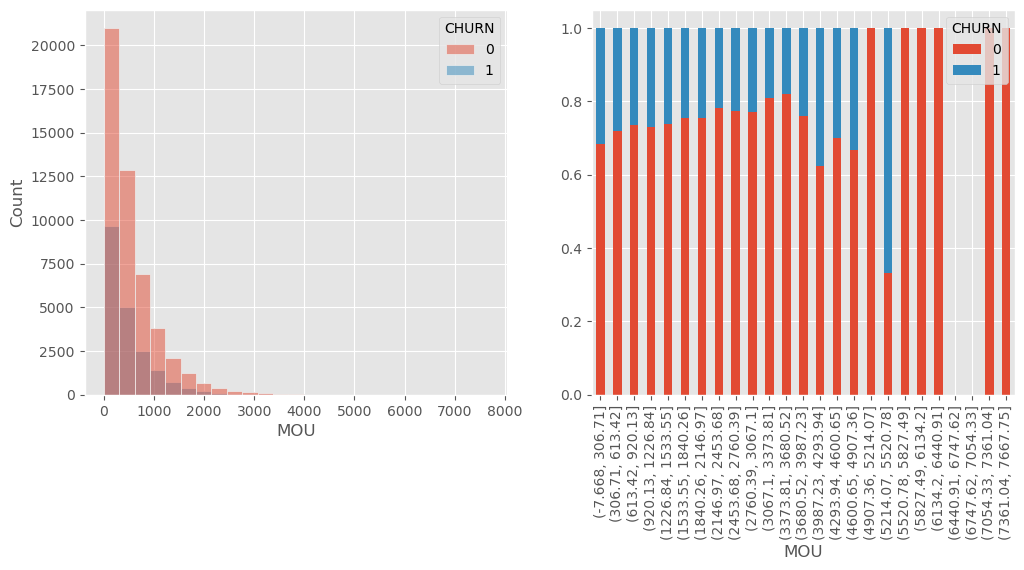

In [31]:
hist_plot('MOU','CHURN',25)

In [32]:
## 연속형 변수 및 명목형 변수 리스 생성 
int_colname = []
cat_colname = []
for i in data_na_treat.columns :
  if pd.api.types.is_numeric_dtype(data_na_treat[i]) == True :
    int_colname.append(i)
  elif pd.api.types.is_string_dtype(data_na_treat[i]) == True :
    cat_colname.append(i)
print(int_colname)
print(cat_colname)

['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM', 'CHANGER', 'DROPVCE', 'BLCKVCE', 'UNANSVCE', 'CUSTCARE', 'THREEWAY', 'MOUREC', 'OUTCALLS', 'INCALLS', 'PEAKVCE', 'OPEAKVCE', 'DROPBLK', 'CALLFWDV', 'CALLWAIT', 'CHURN', 'MONTHS', 'UNIQSUBS', 'ACTVSUBS', 'PHONES', 'MODELS', 'EQPDAYS', 'CUSTOMER', 'AGE1', 'AGE2', 'CHILDREN', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE', 'CREDITGY', 'CREDITZ', 'PRIZMRUR', 'PRIZMUB', 'PRIZMTWN', 'REFURB', 'WEBCAP', 'TRUCK', 'RV', 'OCCPROF', 'OCCCLER', 'OCCCRFT', 'OCCSTUD', 'OCCHMKR', 'OCCRET', 'OCCSELF', 'OWNRENT', 'MARRYUN', 'MARRYYES', 'MARRYNO', 'MAILORD', 'MAILRES', 'MAILFLAG', 'TRAVEL', 'PCOWN', 'CREDITCD', 'RETCALLS', 'RETACCPT', 'NEWCELLY', 'NEWCELLN', 'REFER', 'INCMISS', 'INCOME', 'MCYCLE', 'CREDITAD', 'SETPRCM', 'SETPRC', 'RETCALL', 'CALIBRAT', 'CHURNDEP']
['CSA']


<Figure size 640x480 with 0 Axes>

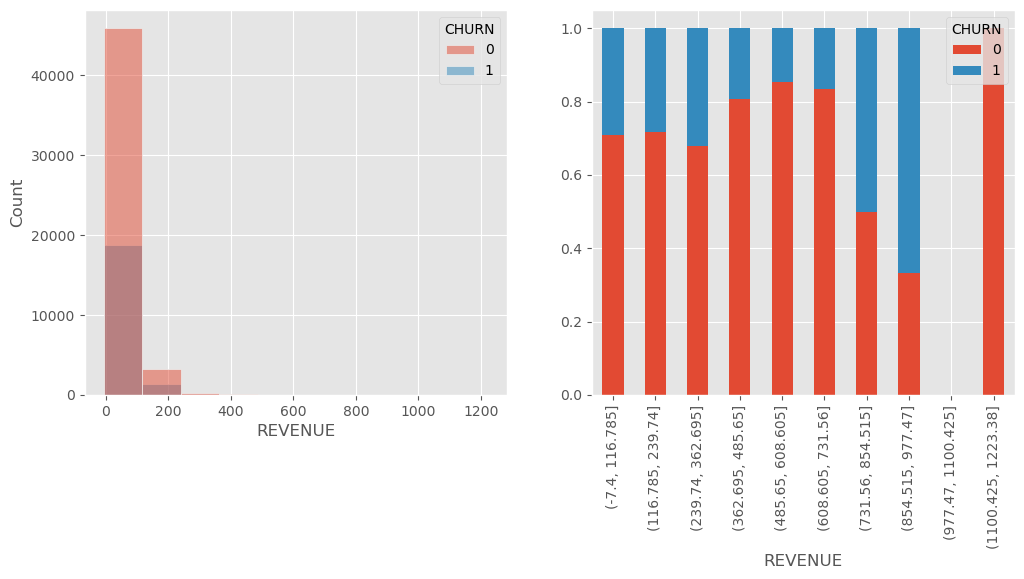

<Figure size 640x480 with 0 Axes>

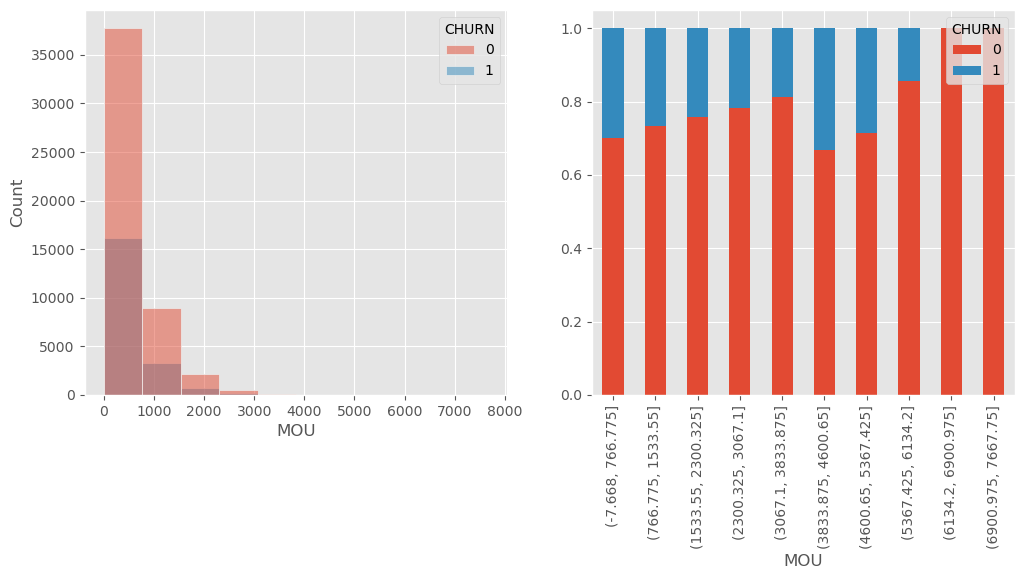

<Figure size 640x480 with 0 Axes>

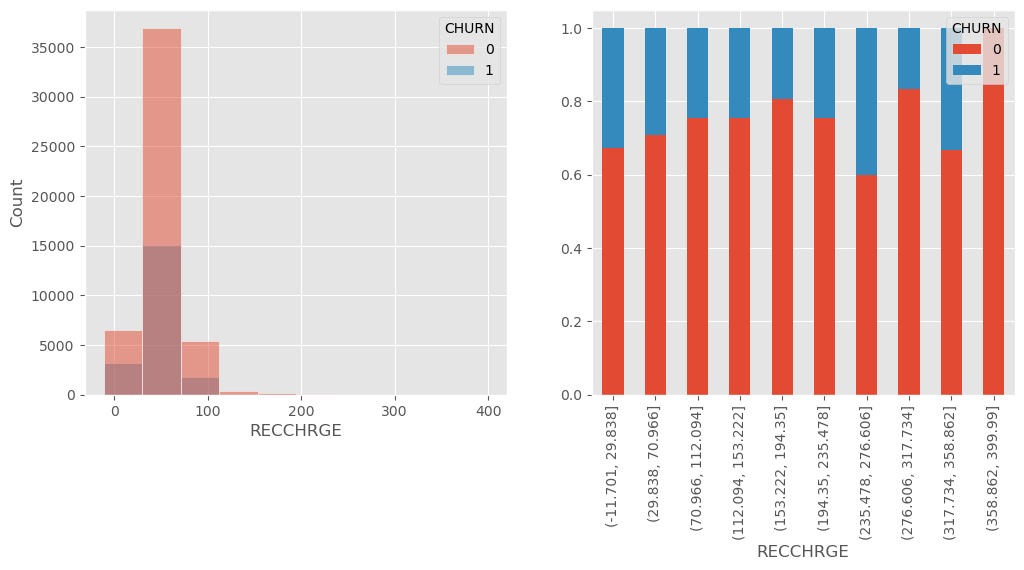

<Figure size 640x480 with 0 Axes>

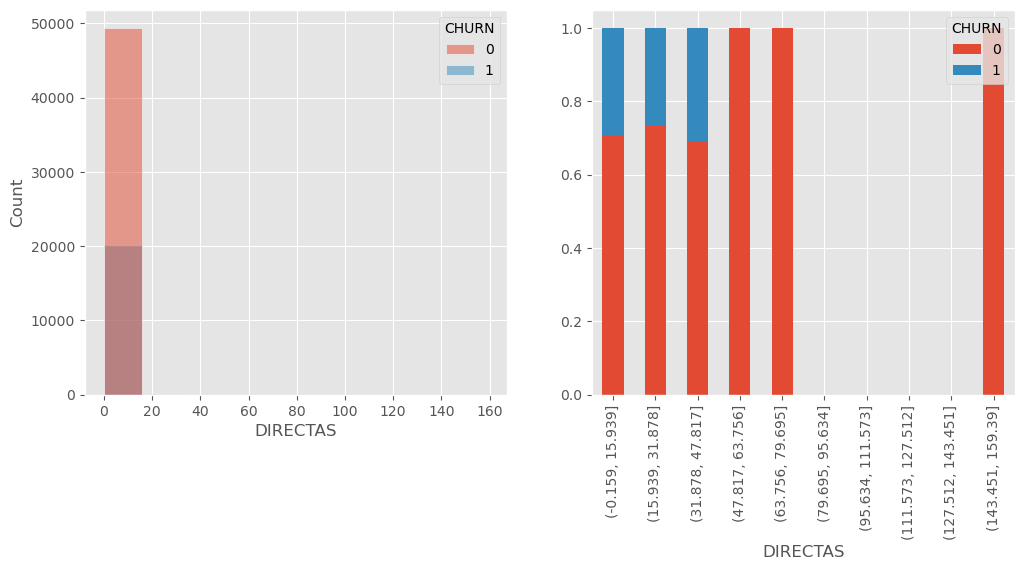

<Figure size 640x480 with 0 Axes>

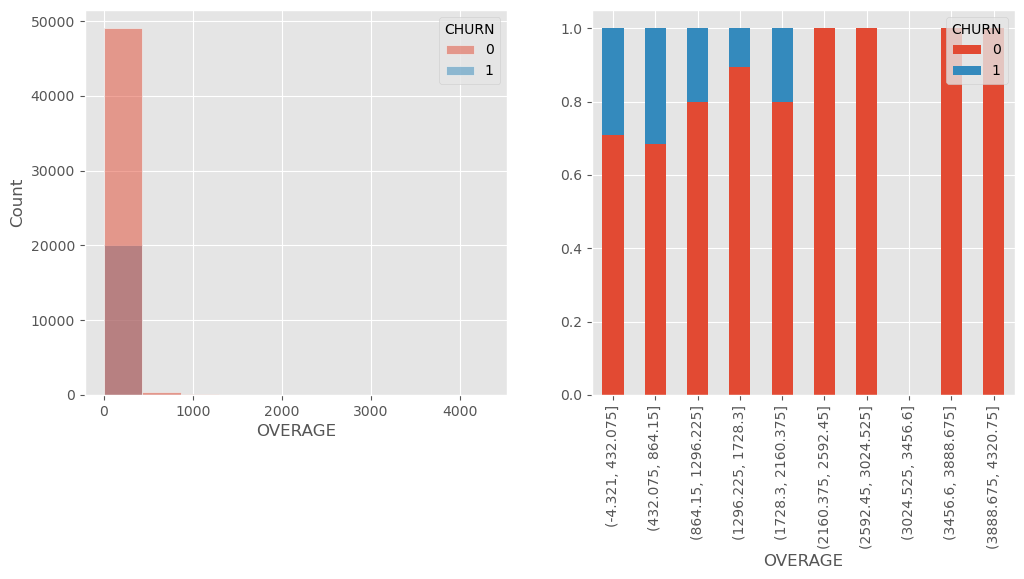

<Figure size 640x480 with 0 Axes>

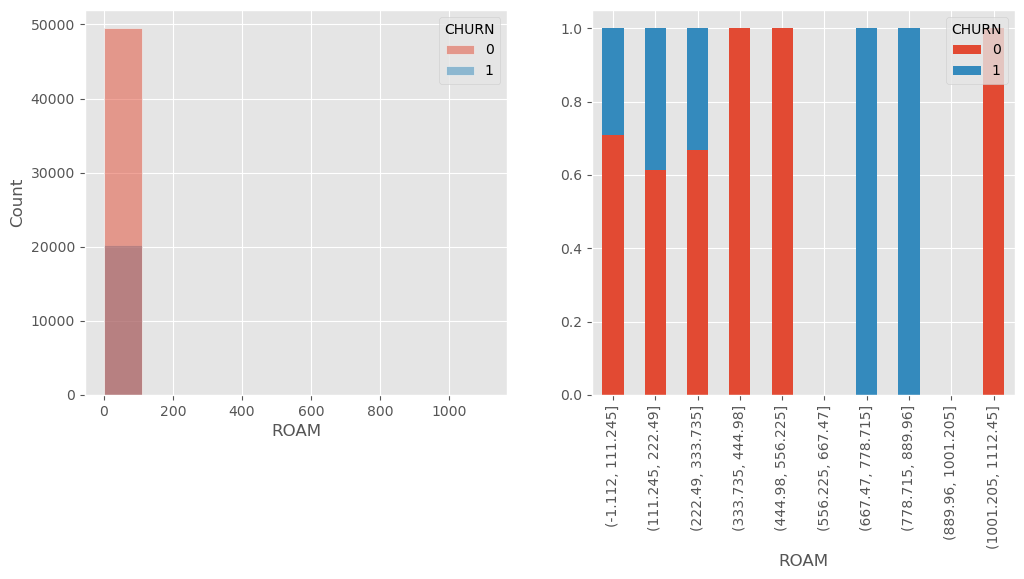

<Figure size 640x480 with 0 Axes>

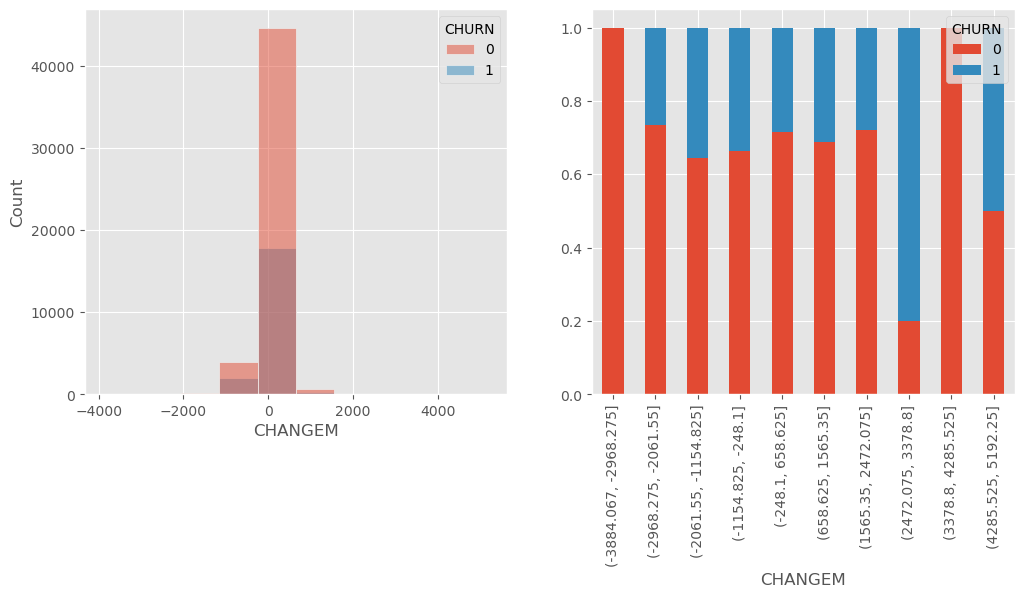

<Figure size 640x480 with 0 Axes>

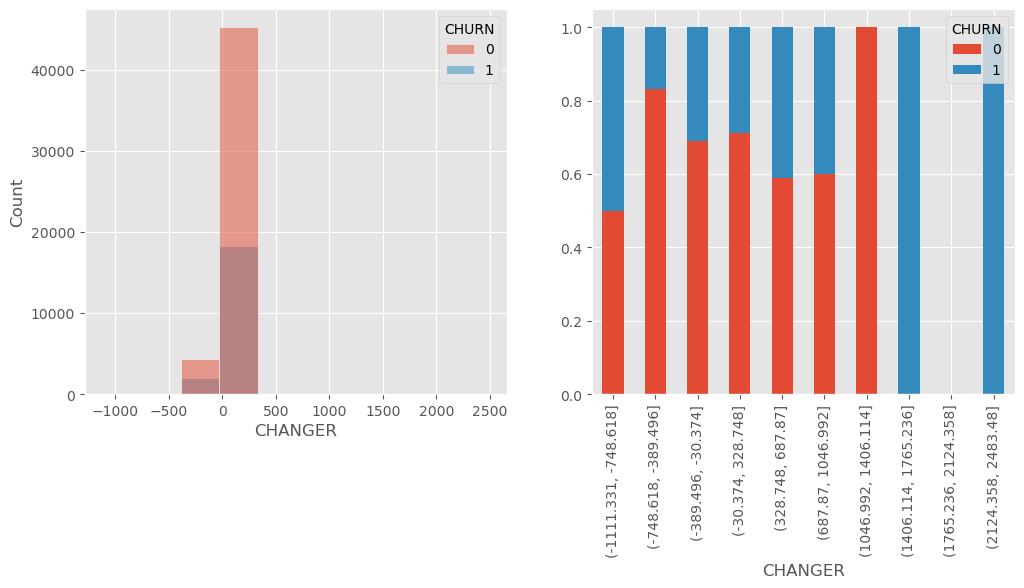

<Figure size 640x480 with 0 Axes>

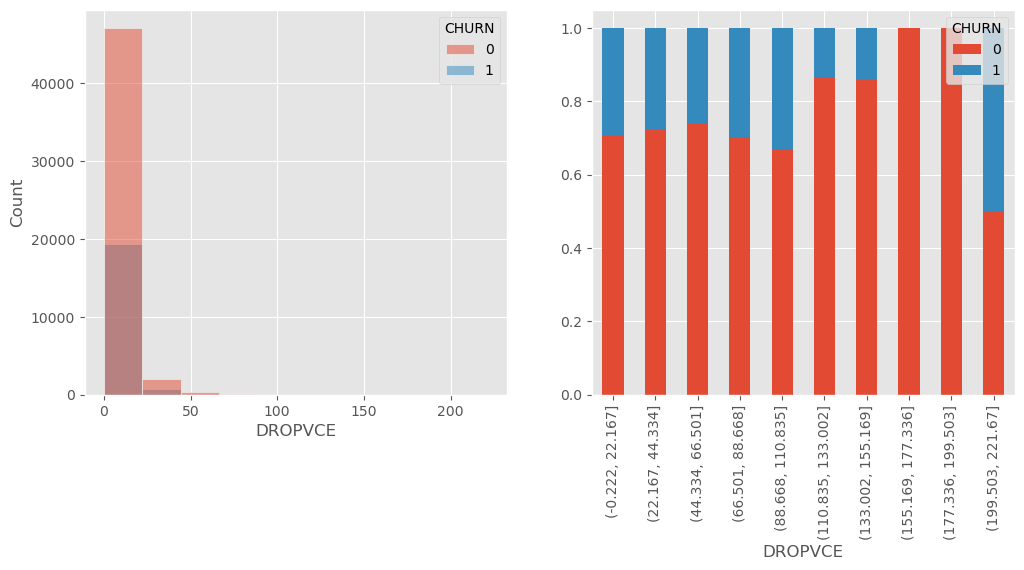

<Figure size 640x480 with 0 Axes>

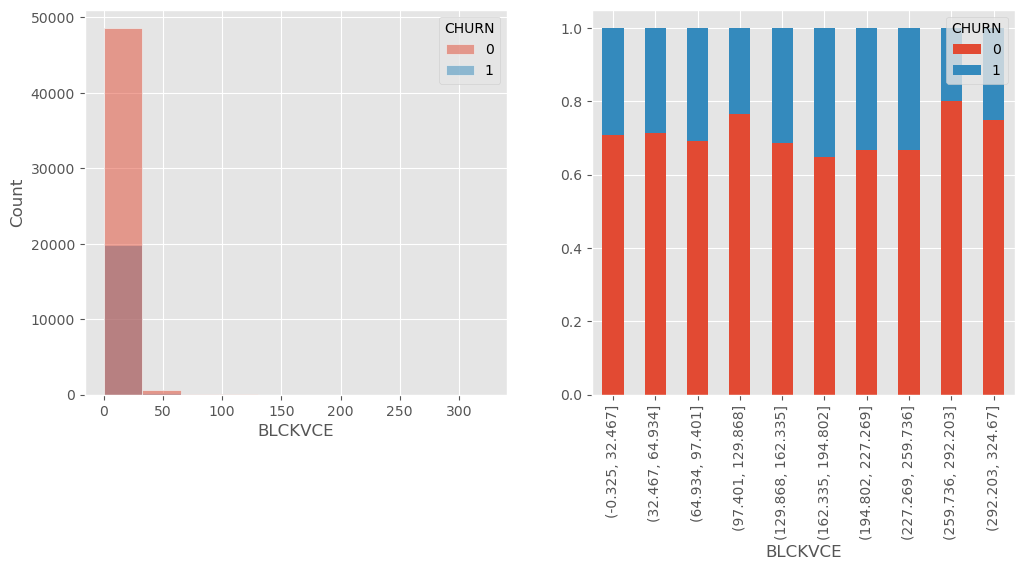

In [33]:
## 연속형 변수 그래프 생성
for i in int_colname[0:10] :
  hist_plot(i,'CHURN',10)